In [1]:
# Importing Libraries 

import os
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported.")

Libraries imported.


In [2]:
# Configuration and Setup 

ASSETS_DIRECTORY = "C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 2/MLP"
print(f"The assets are in {ASSETS_DIRECTORY}")

The assets are in C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 2/MLP


In [4]:
# Loading Model
model = load_model(os.path.join(ASSETS_DIRECTORY, 'mlp_model_dataset2.keras'))
print("Model loaded")

Model loaded


In [6]:
#Loading test data
SPLIT_DIR = os.path.join(ASSETS_DIRECTORY, 'split_dataset')  # Subfolder containing the CSVs

# Load test data
X_test_df = pd.read_csv(os.path.join(SPLIT_DIR, 'X_test.csv'), index_col=0)
y_test_s = pd.read_csv(os.path.join(SPLIT_DIR, 'y_test.csv'), index_col=0).squeeze("columns") # .squeeze converts it to a Series

# Set the index name
X_test_df.index.name = 'patient_id'
y_test_s.index.name = 'patient_id'
print(f"Test set loaded successfully. Found {X_test_df.shape[0]} patients.")

Test set loaded successfully. Found 2310 patients.


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
--- FINAL MODEL PERFORMANCE ON Test Set - Dataset 2 - MLP ---
Accuracy:    0.9792
Precision:   0.9801
Recall:      0.9784 (Sensitivity)
F1-Score:    0.9792
Specificity: 0.9801
AUC-ROC:     0.9990
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1155
           1       0.98      0.98      0.98      1155

    accuracy                           0.98      2310
   macro avg       0.98      0.98      0.98      2310
weighted avg       0.98      0.98      0.98      2310

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


Confusion Matrix


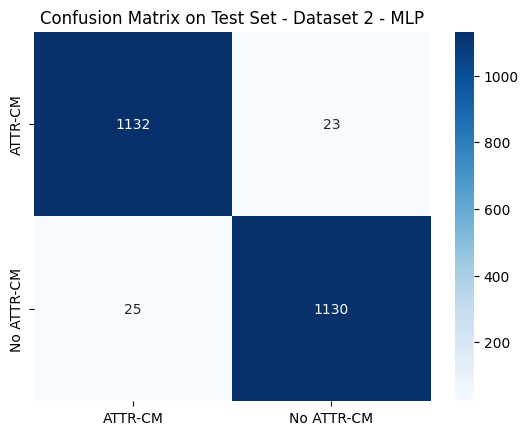


--- AUC-ROC Curve ---


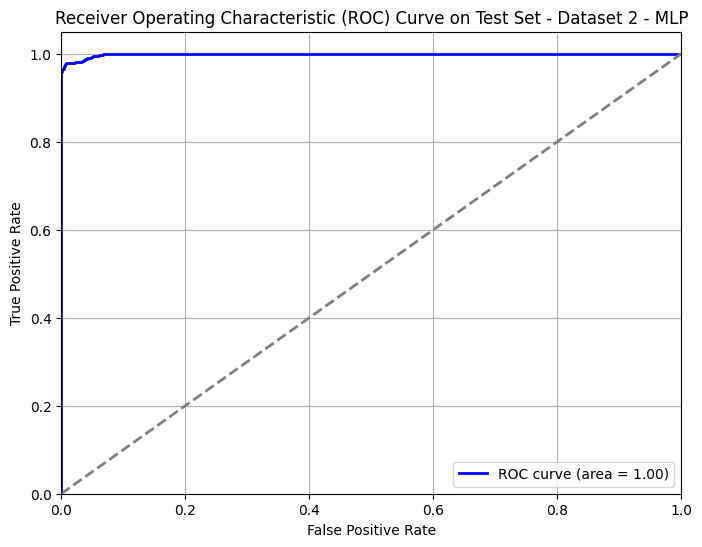

In [7]:
def evaluate_model(y_true, y_pred_proba, set_name="Test Set - Dataset 2 - MLP"):

    # Convert probabilities to binary predictions
    y_pred_binary = (y_pred_proba > 0.5).astype(int)

    # Calculate Metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    
    # Calculate Specificity from Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

       
    print(f"--- FINAL MODEL PERFORMANCE ON {set_name} ---")
    print(f"Accuracy:    {accuracy:.4f}")
    print(f"Precision:   {precision:.4f}")
    print(f"Recall:      {recall:.4f} (Sensitivity)")
    print(f"F1-Score:    {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"AUC-ROC:     {auc_roc:.4f}")
    print("--------------------------------------------------")
    print("--------------------------------------------------")
    print("--------------------------------------------------\n")
    print("\nClassification Report")
    print(classification_report(y_true, y_pred_binary))
    print("--------------------------------------------------")
    print("--------------------------------------------------")
    print("--------------------------------------------------\n")
    print("\nConfusion Matrix")
    conf_matrix = confusion_matrix(y_true, y_pred_binary)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['ATTR-CM', 'No ATTR-CM'],  # predicted labels
                yticklabels=['ATTR-CM', 'No ATTR-CM'])  # actual labels
    plt.title(f'Confusion Matrix on {set_name}')
    plt.show()

    
    print("\n--- AUC-ROC Curve ---")
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve on {set_name}')
    plt.legend(loc="lower right"); plt.grid(True); plt.show()

# Make Predictions using the loaded model and data
predictions_proba = model.predict(X_test_df.values).flatten()
predictions_binary = (predictions_proba > 0.5).astype(int)

# Run Evaluation on Validation Set 
evaluate_model(y_test_s, predictions_proba, set_name="Test Set - Dataset 2 - MLP")

In [8]:
# --- Create and Save the Final Predictions Report ---
final_report = pd.DataFrame({
    'true_label': y_test_s,
    'predicted_probability': predictions_proba,
    'predicted_label': predictions_binary
})
final_report = final_report.reset_index()

FINAL_PREDICTIONS_PATH = os.path.join(ASSETS_DIRECTORY, 'final_test_predictions.csv')
final_report.to_csv(FINAL_PREDICTIONS_PATH, index=False)
print(f"\nFinal report with test predictions saved to: {FINAL_PREDICTIONS_PATH}")


Final report with test predictions saved to: C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 2/MLP\final_test_predictions.csv


In [9]:
print("\n--- Sample of Final Predictions File ---")
print(final_report.head())


--- Sample of Final Predictions File ---
   patient_id  true_label  predicted_probability  predicted_label
0  1400040737           0           3.177105e-10                0
1    73615090           0           1.055866e-01                0
2   350743069           1           9.999657e-01                1
3  1617279205           1           9.987576e-01                1
4   127305262           1           9.999669e-01                1
